# Data processing2.0

### Import packages

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('perluniprops')
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

import csv
import re
import pickle

### Import data

In [3]:
df = pd.read_csv('FoodReviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
new_df = df.get(['Score','Text'])
new_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


### Score distribution

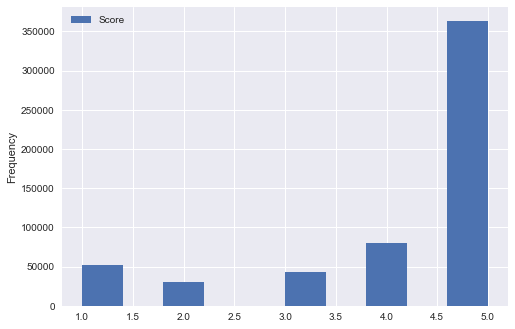

The data set contains 568454 reviews.
Of which 443777 (0.780674) are positive reviews (score 4-5).
And 124677 (0.219326) are negative reviews (score 1-3).


In [6]:
#plt.hist(new_df.get(['Score']).value);
new_df.plot.hist()
plt.show()

nbr_points = len(new_df.Score)
pos_score = 0
neg_score = 0
for score in new_df.Score:
    if score <= 3:
        neg_score += 1
    else:
        pos_score += 1
        
print('The data set contains %d reviews.' %nbr_points)
print('Of which %d (%f) are positive reviews (score 4-5).' %(pos_score,pos_score/nbr_points))
print('And %d (%f) are negative reviews (score 1-3).' %(neg_score,neg_score/nbr_points))

In [7]:
# Remove <this> and make lowercase
texts = new_df.Text.values
#print(texts)
j=0
texts_revised = []
for row in texts:
    tmp = re.sub(r'<.+?>', ' ', row)
    texts_revised.append(tmp.lower())

In [8]:
new_revised_df = new_df.copy()
new_revised_df['Text'] = texts_revised.copy()
new_revised_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


### Redo labels (score)

In [9]:
labels = []
for val in new_revised_df.Score.values:
    if val<=3:
        labels.append(0)
    else:
        labels.append(1)    

### Turn words into indeces

In [11]:
text_col = new_revised_df.Text.values
print(text_col[0])

i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.


In [42]:
from keras.preprocessing.text import Tokenizer,text_to_word_sequence

num_words = 100000
num_tokenizer = Tokenizer(num_words=num_words, filters='!?"#&(),-./:;<=>@[\]^_`{|}~',
                          lower=True)
num_tokenizer.fit_on_texts(text_col)                                  

### Create number representation of reviews

In [44]:
token_num = num_tokenizer.texts_to_sequences(text_col)

print(token_num[0])

[2, 16, 123, 317, 7, 1, 4998, 516, 102, 51, 203, 3, 16, 116, 27, 39, 5, 29, 7, 28, 181, 1, 40, 619, 47, 25, 4, 2635, 57, 4, 1179, 442, 3, 6, 609, 98, 12, 5301, 8, 1775, 3, 93, 8758, 9, 40, 98, 57, 139]


### Get dictionaries for word<->index

In [45]:
word_to_ix = num_tokenizer.word_index
keys = list(word_to_ix.keys())

In [46]:
word_to_ix = num_tokenizer.word_index
word_to_ix['ZERO'] = 0

ix_to_word = {}
ix_to_word['0'] = 'ZERO'
i = 0
for val in keys:
    i+=1
    ix_to_word[str(i)] = val

In [47]:
indexer = num_tokenizer.word_index
indexer

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'to': 5,
 'it': 6,
 'of': 7,
 'is': 8,
 'this': 9,
 'for': 10,
 'in': 11,
 'my': 12,
 'that': 13,
 'but': 14,
 'with': 15,
 'have': 16,
 'not': 17,
 'you': 18,
 'are': 19,
 'was': 20,
 'they': 21,
 'as': 22,
 'on': 23,
 'so': 24,
 'like': 25,
 'these': 26,
 'them': 27,
 'good': 28,
 'be': 29,
 'or': 30,
 'at': 31,
 'one': 32,
 'just': 33,
 'taste': 34,
 'if': 35,
 'very': 36,
 'great': 37,
 'coffee': 38,
 'all': 39,
 'product': 40,
 'flavor': 41,
 'from': 42,
 "it's": 43,
 'tea': 44,
 'can': 45,
 'when': 46,
 'more': 47,
 'we': 48,
 'has': 49,
 'me': 50,
 'food': 51,
 'love': 52,
 'had': 53,
 'will': 54,
 'would': 55,
 'out': 56,
 'than': 57,
 'no': 58,
 'get': 59,
 'other': 60,
 'some': 61,
 'up': 62,
 'about': 63,
 'really': 64,
 'only': 65,
 'too': 66,
 'much': 67,
 "don't": 68,
 'an': 69,
 'your': 70,
 'also': 71,
 'amazon': 72,
 'because': 73,
 'time': 74,
 'use': 75,
 'little': 76,
 'were': 77,
 'there': 78,
 'do': 79,
 'what': 80,
 'which

### Pad review sequences and set a limit

In [48]:
from keras.preprocessing.sequence import pad_sequences

max_num_words = 500 #see distribution in "Sentiment analysis project"
#token_word_pad = pad_sequences(token_word, maxlen=max_num_words, padding='post', truncating='post', value='ZERO')
token_num_pad = pad_sequences(token_num, maxlen=max_num_words, padding='post', truncating='post', value=0)

In [49]:
token_num_pad[0]

array([   2,   16,  123,  317,    7,    1, 4998,  516,  102,   51,  203,
          3,   16,  116,   27,   39,    5,   29,    7,   28,  181,    1,
         40,  619,   47,   25,    4, 2635,   57,    4, 1179,  442,    3,
          6,  609,   98,   12, 5301,    8, 1775,    3,   93, 8758,    9,
         40,   98,   57,  139,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### TOKENIZE based on padded sequence

In [35]:
# # NO GO: takes forever!
# token_word_pad = []
# for row in token_num_pad:
#     token_vec = []
#     for val in row:
#         token = ix_to_word[str(val)]
#         token_vec.append(token)
#     token_word_pad.append(token_vec)

KeyboardInterrupt: 

In [ ]:
# print("Length of token_word_pad for first review: %d" %len(token_word_pad[0]))
# print("Length of token_num_pad: %d" %len(token_num_pad[0]))

# print("First review, tokens and numbers:")
# print(token_word_pad[0])
# print(token_num_pad[0])

### Save to a data frame

In [58]:
type(token_num_pad)
token_num_pad.shape
token_num_pad_list = list(token_num_pad)

In [59]:
d = {'Score': new_revised_df.Score.values, 'Label': labels, 'Word indeces': token_num_pad_list}
review_df = pd.DataFrame(data=d)
review_df.head()

,Score,Label,Word indeces
0,5,1,"[2, 16, 123, 317, 7, 1, 4998, 516, 102, 51, 20..."
1,1,0,"[40, 372, 2210, 22, 5809, 1960, 1075, 1, 1075,..."
2,4,1,"[9, 8, 4, 7126, 13, 49, 82, 275, 4, 162, 9315,..."
3,2,0,"[35, 18, 19, 250, 10, 1, 2625, 570, 11, 24049,..."
4,5,1,"[37, 3580, 31, 4, 37, 86, 78, 20, 4, 2073, 214..."


### Save tokenized data

In [60]:
with open('tokenized_reviews.pickle', 'wb') as handle:
    pickle.dump(review_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Check save

In [45]:
with open('tokenized_reviews.pickle', 'rb') as handle:
    saved_df = pickle.load(handle)

In [46]:
saved_df.head()

,Score,Label,Text
0,5,1,"[i, have, bought, several, of, the, vitality, ..."
1,1,0,"[product, arrived, labeled, as, jumbo, salted,..."
2,4,1,"[this, is, a, confection, that, has, been, aro..."
3,2,0,"[if, you, are, looking, for, the, secret, ingr..."
4,5,1,"[great, taffy, at, a, great, price, ., there, ..."


## Save dictionaries

In [61]:
with open('word_to_ix.pickle', 'wb') as handle:
    pickle.dump(word_to_ix, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('ix_to_word.pickle', 'wb') as handle:
    pickle.dump(ix_to_word, handle, protocol=pickle.HIGHEST_PROTOCOL)